In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_centroids(points, k, pop_size):
    # choosing randomly k cluster centroids 
    centroids = points[np.random.choice(pop_size, k, replace=False)]
    centroids = {i+1:centroids[i] for i in range(k)}
    
    return centroids

In [3]:
def calculate_distance(x, y):
    return np.sqrt(sum((x-y)**2))

In [4]:
def assign_points_to_clusters(points, centroids, clusters):
    # assign points to nearest cluster
    for order, point in enumerate(points):
        
        min_dist = 9999999.9
        min_distanced_center = clusters[order]
        
        for key, center in centroids.items():
        
            dist = calculate_distance(point, center)
           
            if dist <= min_dist:
                min_distanced_center = key
                min_dist = dist
        
        clusters[order] = int(min_distanced_center)
    
    return clusters

In [5]:
# calculate new centroids  
def calculate_centroids(points, centroids, clusters):
          
    for key in centroids.keys():
        
        new_mean = np.mean(points[clusters==key], axis=0)
        centroids[key] = new_mean
        
    return centroids

In [6]:
def kmeans(points, k):
    
    pop_size = len(points)
    
    clusters = np.zeros(pop_size, dtype=int)
    centroids = initialize_centroids(points, k, pop_size)
    
    prev_error = 0
    iter_num = 1
    while True:

        clusters = assign_points_to_clusters(points, centroids, clusters)
        centroids = calculate_centroids(points, centroids, clusters)

        total_error = sum([calculate_distance(centroids[cluster], point) for cluster, point in zip(clusters, points)])

        # print('Iter: ',iter_num,' Total error: ', total_error)

        if total_error == prev_error: break

        prev_error = total_error
        iter_num +=1
    
    return clusters, centroids

k = 10
size=(1000, 365)
points = np.random.random(size=size)*10
clusters, centroids = kmeans(points, k)

In [7]:
k = 10
size=(1000, 2)

points = np.random.randint(0, 100, size=size)
clusters, centroids = kmeans(points, k)

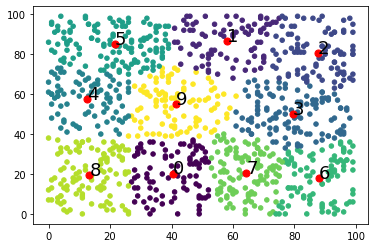

In [8]:
centers = np.array(list(centroids.values()))

fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], c=clusters, s=20, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1)

for k, v in enumerate(centers):
    ax.annotate(k, tuple(v), fontsize=18)

# kmeans with sklearn

In [9]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(points)
y_kmeans = kmeans.predict(points)

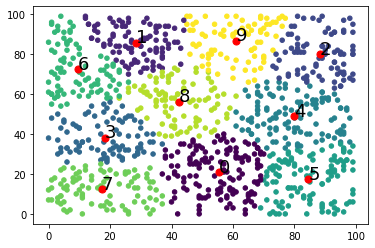

In [10]:
centers = kmeans.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], c=y_kmeans, s=20, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1)

for k, v in enumerate(centers):
    ax.annotate(k, tuple(v), fontsize=18)